ÁRBOLES DE DECISIÓN


Un árbol de decisión es una herramienta, la cual permite tomar una decisión por medio de un único valor de salida, ante eso se le brinda un vector de valores como entrada.  Los valores de entrada y salida pueden ser discretos o continuos, pero, para efectos de la presente tarea consideraremos sólo valores de salida discretos (respuesta positiva o negativa). En otras palabras un árbol de decisión representa una función que toma como entrada un vector de valores de atributo y devuelve una decisión, un único valor de salida.


CARACTERÍSTICAS DE LOS ÁRBOLES DE DECISIÓN

- Plantea el problema desde distintas perspectivas.
- Analiza de manera completa todas las posibles soluciones. 
- Ayuda a realizar las mejores decisiones con base a la información existente y a las mejores suposiciones.
- Su estructura permite analizar las alternativas, los eventos, las probabilidades y los resultados. 

ESTRUCTURA DE LOS ÁRBOLES DE DECISIÓN

- Nodo de decisión: está asociado a uno de los atributos y tiene dos o más ramas que salen de él, cada una de ellas representa los posibles valores que puede tomar el atributo asociado. De alguna forma, un nodo de decisión es como una pregunta que se le hace al ejemplo analizado, y dependiendo de la respuesta que dé, el flujo tomará una de las ramas salientes.
- Nodo respuesta: está asociado a la clasificación que se quiere proporcionar, y nos devuelve la decisión del árbol con respecto al ejemplo de entrada.


DESCRIPCIÓN DEL ALGORITMO

Lo primero antes de hablar del algoritmo es tener claro las fórmulas necesarias para el mismo: 

ENTROPÍA

Es la medida de la incertidumbre de una variable aleatoria, y se representa por:

$$H(V)=-\sum_{k}P(vk)\log_{2}{P(vk)}$$

Donde vk representa todas las diferentes posibles predicciones.

GANANCIA DE INFORMACIÓN

Es una reducción en la entropía y se cálcula de la siguiente manera:

$$G(X)=B(\frac{p}{p+n})-Residuo(X)$$

Donde p representa los casos positivos y n los negativos. Además, Residuo(X) está dado por la fórmula:

$$Residuo(X)=\sum_{k}^d \frac{pk+nk}{p+n} B(\frac{pk}{pk+nk})$$

Donde k representa cada atributo, pk representa los casos positivos para ese atributo, nk los casos negativos para ese atributo, p y n son los positivos y negativos totales del conjunto de datos y, B representa la entropía.

EXPLICACIÓN

El primer paso para crear un árbol de decisión es obtener la raíz, para lo cual, se calcula la entropía, es decir, se obtienen todas las posibles predicciones y sus probabilidades según el conjunto de datos de entrenamiento, y se aplica la fórmula de la entropía. Por ejemplo, si se tienen 3 predicciones diferentes, como X,F y Z, con probabilidades a,b y c respectivamente, el desarrollo de la fórmula sería:

$$-P(X)\log_{2}{(P(X))}  \ -P(F)\log_{2}{(P(F))} \ -P(Z)\log_{2}{(P(Z))} \ = \ -a\log_{2}{(a)} \ -b\log_{2}{(b)} \ -c\log_{2}{(c)}$$

Una vez calcula la entropía se procede a tomar el conjunto de datos de entrenamiento y para cada atributo se cálcula su ganancia, el atributo que ofrezca mayor ganancia será el elegido como la raíz. Supongamos que X obtiene la mayor ganancia de entre los tres atributos antes mencionados, por lo tanto X es el atributo raíz.

Lo siguiente es determinar las ramas de la raíz, para ello se divide el conjunto de datos con base en el valor de predicción del atributo del seleccionado como nodo raíz, y se repite recursivamente con las distintas ramas todo el proceso desde el inicio de la explicación.

Aspectos a tomar en cuenta:

- Si en el proceso, la entropía es 0, quiere decir que estamos ante la presencia de una hoja, lo cual implica una predicción.
- El proceso recursivo se aplica con todos los posibles valores del atributo, de esta forma se generan las ramas.
- Se debe de tener en cuenta que es posible que se descarten algunos atributos, esto quiere decir que en el árbol de decisión no necesariamente deben aparecer todos los atributos.


IMPORTS

In [58]:
### imports necesarios
#from __future__ import print_function
from math import *

NOTA: USUARIOS DE WINDOWS

In [76]:
### si no se está ejecutando en windows las siguientes lineas deben de estar comentadas
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

CLASES

In [60]:
### Clases necesarias
class Condicion:
    def __init__(self, columna, valor):
        self.columna = columna
        self.valor = valor

    def match(self, fila):
        resultado = fila[self.columna]
        if es_numero(resultado):
            return resultado >= self.valor
        else:
            return resultado == self.valor

    def __repr__(self):
        condicion = "=="
        if es_numero(self.valor):
            condicion = ">="
        return "%s %s %s?" % (
            header[self.columna], condicion, str(self.valor))

class Hoja:
    def __init__(self, filas):
        self.predicciones = numeros_resultados(filas)

class Nodo_Decision:
    def __init__(self, condicion, true_rama, false_rama):
        self.condicion = condicion
        self.true_rama = true_rama
        self.false_rama = false_rama


CONJUNTO DE ENTRENAMIENTO

In [61]:
### conjunto de entrenamiento
from graphviz import Digraph


header =["Carro",   "Calor",    "Dia",      "Distancia",    "Comida",       "Ir al supermercado"]
training_data = [
        ['True',    'True',     'False',        5,          "False",        'True'],
        ['True',    'False',    'True',         4,          "False",        'True'],
        ['False',   'False',    'True',         3,          "True",         'False'],
        ['True',    'True',     'False',        4,          "True",         'False'],
        ['True',    'True',     'False',        4,          "False",        'True'],
        ['True',    'False',    'False',        5,          "False",        'True'],
        ['False',   'False',    'True',         3,          "True",         'False'],
        ['False',   'False',    'True',         3,          "False",        'True'],
        ['False',   'False',    'False',        5,          "True",         'False'],
        ['True',    'False',    'False',        4,          "True",         'True']]

PRINCIPAL

---------------------- Cálculos ---------------------- 

Entropía:  0.9709505944546686
Ganancias de los atributos: 
  -  Carro 0.256425891682003
  -  Calor 0
  -  Dia 0
  -  Distancia 0
  -  Comida 0.6099865470109874
Atributo seleccionado:  Comida 

Entropía:  0.0
Ganancias de los atributos: 
  -  Carro 0.0
  -  Calor 0.0
  -  Dia 0.0
  -  Distancia 0.0
  -  Comida 0
!No hay atributo seleccionado, es una predicción: una hoja¡ 

Entropía:  0.7219280948873623
Ganancias de los atributos: 
  -  Carro 0.3219280948873623
  -  Calor 0
  -  Dia 0
  -  Distancia 0
  -  Comida 0
Atributo seleccionado:  Carro 

Entropía:  0.0
Ganancias de los atributos: 
  -  Carro 0
  -  Calor 0
  -  Dia 0.0
  -  Distancia 0.0
  -  Comida 0
!No hay atributo seleccionado, es una predicción: una hoja¡ 

Entropía:  1.0
Ganancias de los atributos: 
  -  Carro 0
  -  Calor 1.0
  -  Dia 0
  -  Distancia 0
  -  Comida 0
Atributo seleccionado:  Calor 

Entropía:  0.0
Ganancias de los atributos: 
  -  Carro 0
  -  Calor 

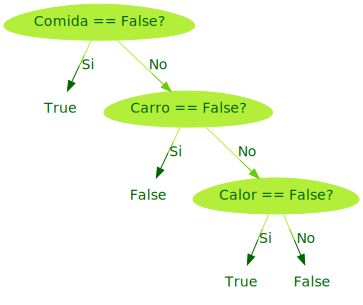

In [62]:


#Función que saca los valores diferentes de una columna en específico y los coloca en la matriz filas.
def valores_columna(filas, columna):
    return set([fila[columna] for fila in filas])

#Función que saca el conteo de todos los posibles resultados (respecto a la última columna)
def numeros_resultados(filas):
    conteo = {}  # resultado.
    for fila in filas:
        # in our dataset format, the label is always the last column
        label = fila[-1]
        if label not in conteo:
            conteo[label] = 0
        conteo[label] += 1
    return conteo

#Función que dice si un valor es número o no
def es_numero(valor):
    return isinstance(valor, int) or isinstance(valor, float)

#Función que divide datos, de acuerdo a si cumplen o no una condición.
def division_datos(filas, condicion):
    true_filas, false_filas = [], []
    for fila in filas:
        if condicion.match(fila):
            true_filas.append(fila)
        else:
            false_filas.append(fila)
    return true_filas, false_filas

def entropia(filas):
    counts = numeros_resultados(filas)
    entropia = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(filas))
        entropia = entropia + (-1* (prob_of_lbl)* log(prob_of_lbl,2))
    return entropia

def ganancia_informacion(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * entropia(left) - (1 - p) * entropia(right)

def mejor_atributo(filas):
    ganancia_maxima = 0  # keep track of the best information ganancia
    condicion_maxima = None  # keep train of the feature / value that produced it
    current_uncertainty = entropia(filas)
    print("Entropía: ", current_uncertainty)
    n_features = len(filas[0]) - 1  # number of columns
    columna_seleccionada = 0
    
    print ("Ganancias de los atributos: ")
    total = 0
    for col in range(n_features):  # for each feature
        ganancia_por_columna = 0
        valores = set([fila[col] for fila in filas])  # unique valores in the column
        for val in valores:  # for each value
            condicion = Condicion(col, val)
            true_filas, false_filas = division_datos(filas, condicion)
            if len(true_filas) == 0 or len(false_filas) == 0:
                continue
            # Calculate the information ganancia from this split
            ganancia = ganancia_informacion(true_filas, false_filas, current_uncertainty)
            #print(ganancia)
            total = total + ganancia
            if ganancia >= ganancia_maxima:
                ganancia_por_columna = ganancia
                ganancia_maxima, condicion_maxima = ganancia, condicion
                columna_seleccionada = col
                
        print ("  - ", header[col], ganancia_por_columna)
    if (total == 0):
        print("!No hay atributo seleccionado, es una predicción: una hoja¡", '\n')
    else:
        print("Atributo seleccionado: ", header[columna_seleccionada],'\n')
    return ganancia_maxima, condicion_maxima

def construir_arbol(filas):
    ganancia, condicion = mejor_atributo(filas)
    if ganancia == 0:
        return Hoja(filas)
    true_filas, false_filas = division_datos(filas, condicion)

    #Construcción de las ramas.
    true_rama = construir_arbol(true_filas)
    false_rama = construir_arbol(false_filas)
    
    return Nodo_Decision(condicion, true_rama, false_rama)

def visualizar_arbol(node, origen="0", condicionA = ""):
    if isinstance(node, Hoja):
        #Hoja
        destino =  list(node.predicciones.keys())[0] +" " + origen
        arbol.node(origen, label=origen, shape="egg", style="filled",color="olivedrab2",fontname="Century Gothic", fillcolor="olivedrab2", fontcolor="darkgreen")
        arbol.node(destino, label=list(node.predicciones.keys())[0], shape="plaintext",fontname="Century Gothic", fontcolor="darkgreen")
        arbol.edge(origen, destino,label=condicionA,fontname="Century Gothic",color="olivedrab2:chartreuse3;0.25:darkgreen", fontcolor="darkgreen") #Hoja
        return

    #Nodo
    if (origen == "0"):
        origen = str(node.condicion)
    else:
        arbol.node(origen, label=origen, shape="egg", style="filled",fontname="Century Gothic",color="olivedrab2", fillcolor="olivedrab2", fontcolor="darkgreen")
        arbol.edge(origen, str(node.condicion), label=condicionA,fontname="Century Gothic", color="olivedrab2:chartreuse3;0.25darkgreen", fontcolor="darkgreen") #Nodo
        origen =str(node.condicion)
        
    #Rama True
    visualizar_arbol(node.true_rama,origen,"Si")
    
    #Rama False
    visualizar_arbol(node.false_rama,origen,"No")



arbol = Digraph('G', filename='arbol.gv')
print ("---------------------- Cálculos ----------------------", '\n')
arbol_resultado = construir_arbol(training_data)
visualizar_arbol(arbol_resultado )
arbol




RANDOM FOREST

Este algoritmo perteneciente al tipo de Machine Learning conocido como Aprendizaje Supervisado, es una combinación de árboles predictores, de modo que cada árbol depende de los valores del vector aleatorio muestra independientemente y con el mismo distribuidor para todos los árboles en el bosque. La generalización error para Random Forests converge conforme el límite de número de árboles crece. La generalización error de un bosque de árboles clasificadores depende de la fuerza que posea cada árbol individualmente en el bosque y la correlación entre ellos.

ALGUNOS USOS

- Teledetección
Usado en dispositivos ETM para adquirir imagenes de la superficie terrestre.
Con una exactitud mayor y un tiempo de entrenamiento menor.
- Detección de Objetos
La detección de multiples clases se lleva a cabo mediante el uso de algoritmos RF.
Provee mejor detección en ambientes complicados.
- Kinect
El dispositivo detector de movimiento utilizado por XBOX utiliza RF.
Rastrea movimientos del sujeto y los recrea en el juego.

VENTAJAS

- Sin overfitting
    - Utilización de múltiples árboles, lo que reduuce el riesgo de overfitting.
    - Tiempo de entrenamiento es menor.
- Alta efectividad
    - Corre eficientemente en base de datos grandes.
    - Para datos grandes produce un nivel alto de efectividad.
- Estima datos faltantes
    - Random Forest puede mantener la exactitud inclusive cuando hacen falta algunos datos.

¿CÓMO LO HACE?

Random Decision Forest es un método que opera al crear múltiples árboles de decisión durante la face de entrenamiento.
La decisión de la mayoría de árboles es escogida por el Random Forest como decisión final.

Supongamos que tenemos una entrada **_X_** y 3 árboles de decisión donde: 

| . | Árbol 1 | Árbol 2 | Árbol 3 | Random Forest | Elección |
| --- | --- | --- | --- | --- | ---|
| **Respueta** | Manzana | Naranja | Manzana  | . | . |
| **Manzana** | . | . | . | 2 | **<--** |
| **Naranja** | . | . | . | 1 | . |

<br><br>
Se puede apreciar cómo la respuesta de el Árbol 1 y 3 fue Manzana, a diferencia del 2 que dió como respuesta Naranja, para el parámetro **_X_**, luego el algorítmo Random Forest verifica los output de cada árbol y deduce que la respuesta correcta es aquella que posee mayores ocurrencias entre los árboles, por lo tanto se decide que la respuesta correcta para el prámetro **_X_** es Manzana.

CÓDIGO

A continuación se muestra un código en python, en el cual se implementa una solución para el Algoritmo Random Forest, en este se utiliza un librería llamada scikit, de la cual se toma un banco de datos de lirios, el cual posee el largo y ancho del Sépalo y Pétalo en centimetros de esta especie de flores, de los cuales se puede deducir si el lirio es setosa, versicolor o virginica.

In [63]:
#!/usr/bin/env python -W ignore::DeprecationWarning

#Librería para la carga de datos de lirios
from sklearn.datasets import load_iris

#Librería scikit que contiene el algorítmo de Random Forest
from sklearn.ensemble import RandomForestClassifier

#Librería pandas para crear el formato de los datos(tablas)
import pandas as pd

#Librería numpy para números aleatorios
import numpy as np


np.random.seed()

In [64]:
#Carga de los datos de lirios desde la libreria
iris = load_iris()

#Se crea una tabla con las caracteristicas de los datos
tabla = pd.DataFrame(iris.data, columns=['Sépalo largo', 'Sépalo ancho', 'Pétalo largo','Pétalo ancho'])

#Muestra las primeras 5 filas
tabla.head()

,Sépalo largo,Sépalo ancho,Pétalo largo,Pétalo ancho
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
#Se agrega la columna Especies a la tabla (objetivo a predecir)
tabla['Especies'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#Muestra las primeras 5 filas
tabla.head()

,Sépalo largo,Sépalo ancho,Pétalo largo,Pétalo ancho,Especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
#Se crear la columna De Entrenamiento (asigna 75% de los datos de manera aleatoria)
tabla['De Entrenamiento'] = np.random.uniform(0, 1, len(tabla)) <= .75

#Muestra las primeras 5 filas
tabla.head()

,Sépalo largo,Sépalo ancho,Pétalo largo,Pétalo ancho,Especies,De Entrenamiento
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [67]:
#Se crean 2 tablas una para entrenamiento y otra para prueba
entrenamiento = tabla[tabla['De Entrenamiento']==True]
prueba =        tabla[tabla['De Entrenamiento']==False]

print('Numero de observaciones en los datos de entrenamiento:', len(entrenamiento))
print('Numero de observaciones en los datos de prueba:', len(prueba))

Numero de observaciones en los datos de entrenamiento: 111
Numero de observaciones en los datos de prueba: 39


In [68]:
#Asigna las caracteristicas (primeras 4 colum) a una variables
caracteristicas = tabla.columns[:4]

#Imprime la lista
caracteristicas

Index(['Sépalo largo', 'Sépalo ancho', 'Pétalo largo', 'Pétalo ancho'], dtype='object')

In [69]:
#transforma Especies (setosa, versicolor, virginica) en (0s, 1s y 2s) respectivamente para un merjor manejo
y = pd.factorize(entrenamiento['Especies'])[0]

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [70]:
#Crea el RandomForestClassifier con jobs=2 y random_state=0 por estandar
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#Entrenamiento del clasificador
clf.fit(entrenamiento[caracteristicas], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
#Una vez entrenado el clasificador
#Se intenta predecir los valores con los datos de prueba (25%)
result = clf.predict(prueba[caracteristicas])

#Imprime las probabilidades de predicción de las primeras 10 observaciones
clf.predict_proba(prueba[caracteristicas])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.9, 0.1]])

In [72]:
#transforma los 0s, 1s y 2s en su respectivo nombre setosa, versicolor, virginica
preds = iris.target_names[result]

#imprime las predicciones
preds[0:25]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica'], dtype='<U10')

In [73]:
#Imprime el valor real de la especie para luego
#verificar si la predicción fue buena
real = prueba['Especies']

#Muestra los primeros 5 valores
real.head()

4     setosa
8     setosa
9     setosa
14    setosa
30    setosa
Name: Especies, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [74]:
#Crea e imprime una matriz entre la interseccion de real y predicciones
final = pd.crosstab(prueba['Especies'], preds, rownames=['Especies Reales'], colnames=['Especies Predecidas'])

final

Especies Predecidas,setosa,versicolor,virginica
Especies Reales,,,
setosa,9,0,0
versicolor,0,14,1
virginica,0,2,13


In [75]:
numExitos = final.loc['setosa','setosa'] + final.loc['versicolor','versicolor'] + final.loc['virginica','virginica']

total = len(prueba.index)*1.0

efectividad = numExitos/total

print('Total datos de prueba:', total)
print('Numero de Exitos:', numExitos)


efectividad

Total datos de prueba: 39.0
Numero de Exitos: 36


0.9230769230769231

REFERENCIAS

- Alto Nivel. (2013, 1 julio). Árbol de decisión, una herramienta para decidir bien. Recuperado 10 septiembre, 2018, de https://www.altonivel.com.mx/liderazgo/management/36690-arbol-de-decision-una-herramienta-para-decidir-correctamente/
- Breiman. L. (2001) RANDOM FORESTS. Setiembre 8, 2018. de Statistics Department University of California Berkeley, CA 94720
- Sancho C. F. Aprendizaje Inductivo: Árboles de Decisión - Fernando Sancho Caparrini. Recuperado 10 septiembre, 2018, de http://www.cs.us.es/%7Efsancho/?e=104
- Simplilearn. (2018) Random Forest Algorithm - Random Forest Explained | Random Forest In Machine Learning | Simplilearn. Sitio web: https://www.slideshare.net/Simplilearn/random-forest-algorithm-random-forest-explained-random-forest-in-machine-learning-simplilearn-91647398
